In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


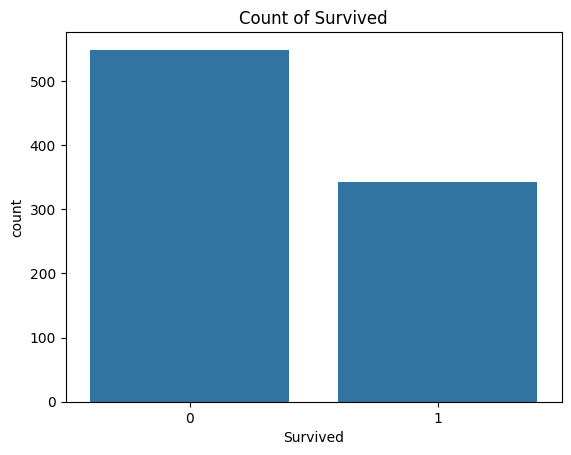

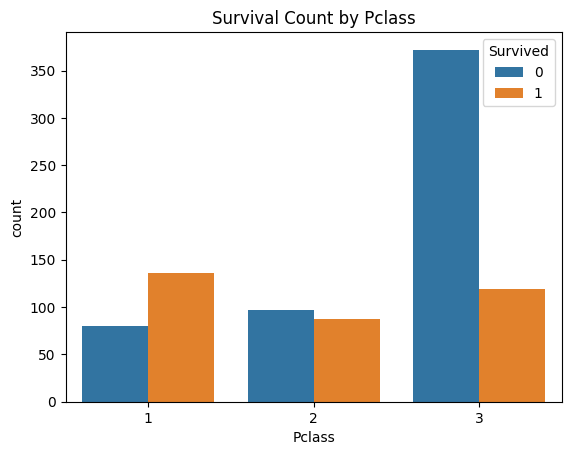

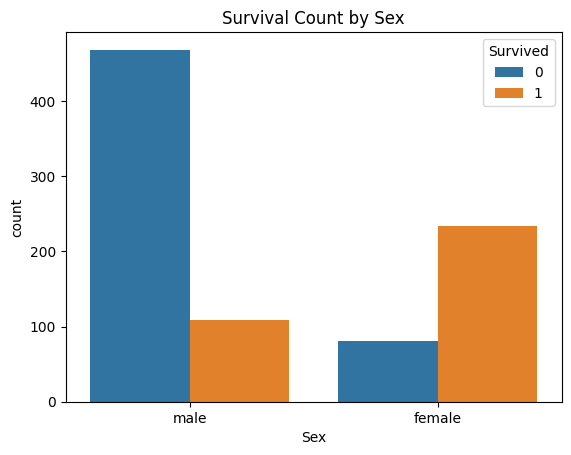

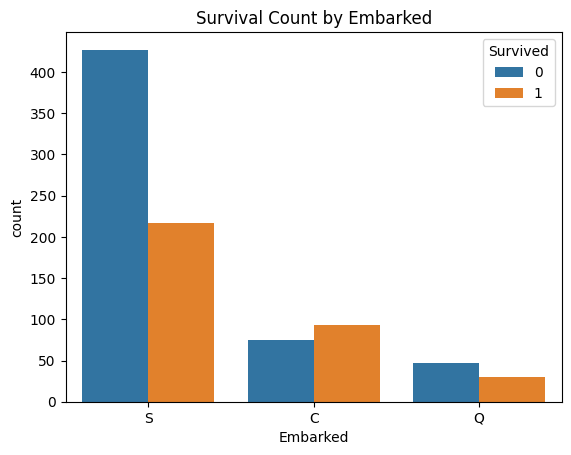

In [3]:
#Barchart of Survived, Pclass, Sex, Embarked
sns.countplot(data=df, x='Survived')
plt.title('Count of Survived')
plt.show()

# Bar chart for Pclass
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Survival Count by Pclass')
plt.show()

# Bar chart for Sex
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Survival Count by Sex')
plt.show()

# Bar chart for Embarked
sns.countplot(data=df, x='Embarked', hue='Survived')
plt.title('Survival Count by Embarked')
plt.show()

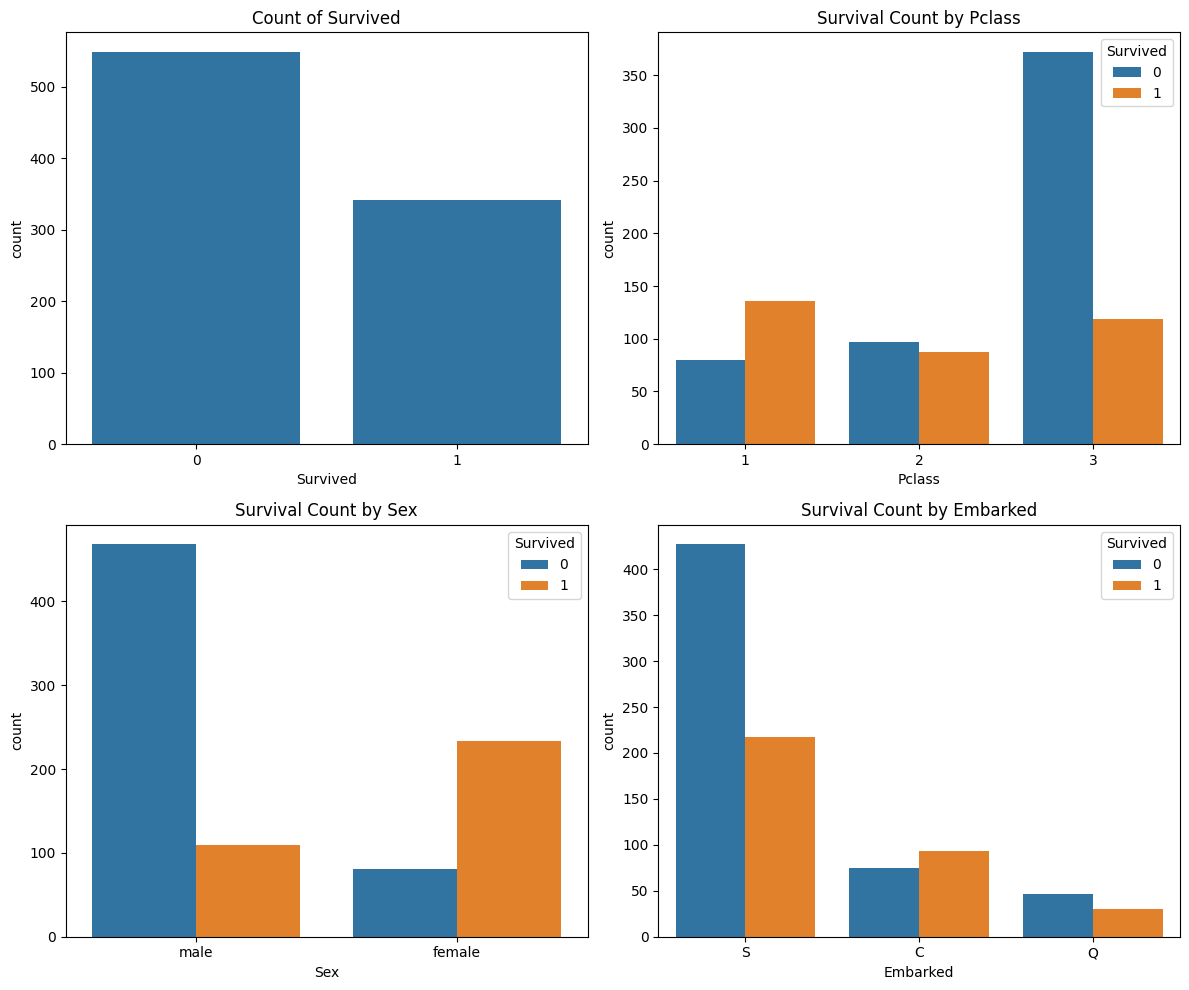

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Survived
sns.countplot(data=df, x='Survived', ax=axes[0, 0])
axes[0, 0].set_title('Count of Survived')

# Pclass with hue=Survived
sns.countplot(data=df, x='Pclass', hue='Survived', ax=axes[0, 1])
axes[0, 1].set_title('Survival Count by Pclass')

# Sex with hue=Survived
sns.countplot(data=df, x='Sex', hue='Survived', ax=axes[1, 0])
axes[1, 0].set_title('Survival Count by Sex')

# Embarked with hue=Survived
sns.countplot(data=df, x='Embarked', hue='Survived', ax=axes[1, 1])
axes[1, 1].set_title('Survival Count by Embarked')

plt.tight_layout()
plt.show()


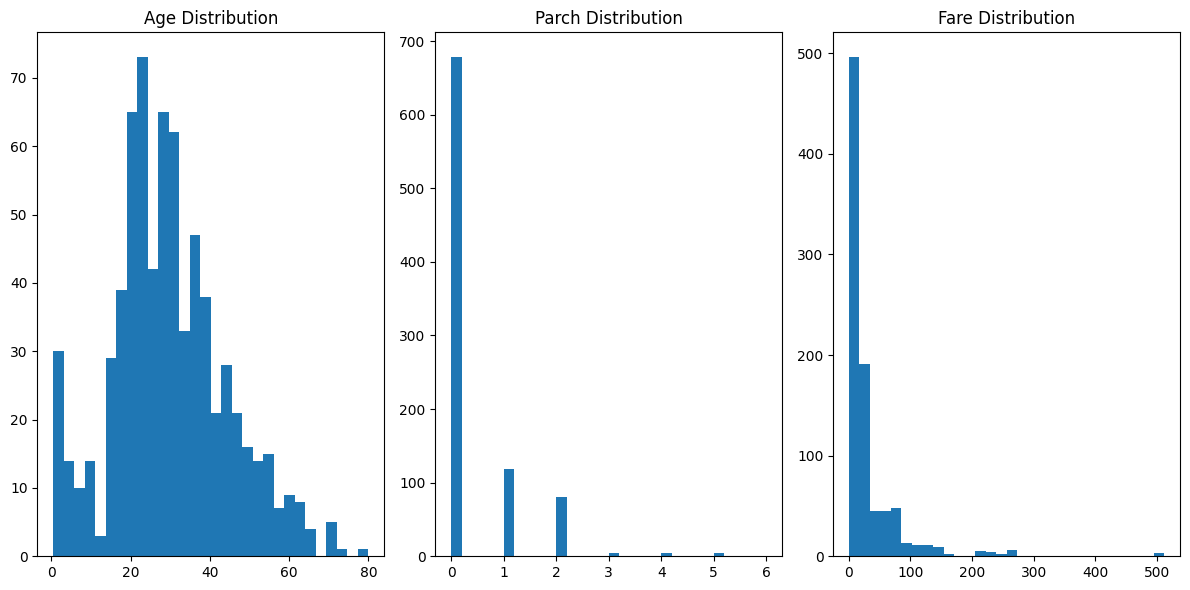

In [12]:
#Histogram of Age, Parch, Fare
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.hist(df['Age'], bins=30)
plt.title('Age Distribution')
plt.subplot(1, 3, 2)
plt.hist(df['Parch'], bins=30)
plt.title('Parch Distribution')
plt.subplot(1, 3, 3)
plt.hist(df['Fare'], bins=30)
plt.title('Fare Distribution')
plt.tight_layout()
plt.show()

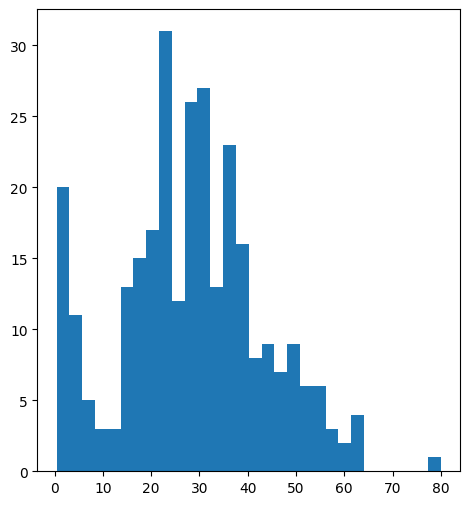

In [16]:
#Plot histogram of age for survived and did not survived class

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)

plt.hist(df[df['Survived'] == 1]['Age'],bins=30,label='Survived')
plt.show()

<Axes: xlabel='Pclass', ylabel='Survived'>

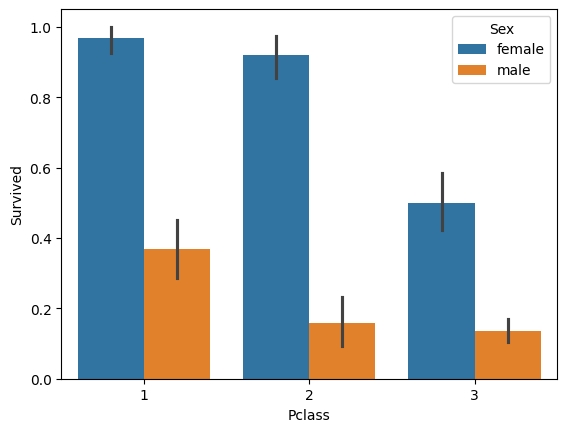

In [5]:
#Count class and geder wise survival rate - plot with appropriate chart
#Age wise Distribution of Male and Female passengers

# val = df['Pclass'].groupby(df['Sex'],axis = 0).value_counts()
# val.plot(kind='bar')
# plt.show()

sns.barplot(data=df, x='Pclass', y='Survived', hue='Sex')

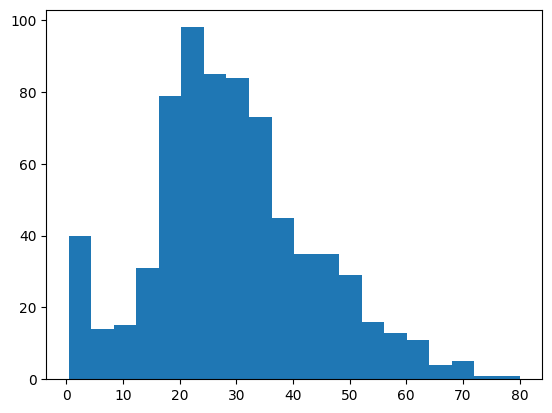

In [28]:
#Histogram of Age of the given data set(sample)

plt.hist(df['Age'],bins=20)
plt.show()

In [32]:
#Replace the msiing values in Embarked column by 'S'

df['Embarked'].fillna('S',inplace=True)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [36]:
#Impute the missing values in Fare column with median value

df['Fare'].fillna(df['Fare'].median(),inplace=True)
df.isnull().sum()

C:\Users\Panchakoti Sravan\AppData\Local\Temp\ipykernel_5900\2287364762.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Fare'].fillna(df['Fare'].median(),inplace=True)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [39]:
#Impute the Age column. It has too many missing values but it may be important. 
#We fill the missing values with numbers randomly drawn from distribution
#that has same mean and standard deviation as non missing Age data
mean = df['Age'].mean()
std = df['Age'].std()

rand_values = np.random.normal(mean,std,df['Age'].isnull().sum())
df.loc[df['Age'].isnull(),'Age'] = rand_values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [40]:
# Create and add a new feature FamilySize as a combination of SibSp and Parch
#FamilySize = Parch + SibSp + 1

df['FamilySize'] = df['Parch'] + df['SibSp'] + 1
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [43]:
# Create new feature IsAlone from FamilySize
#If FamilySize == 1 then IsAlone = True else IsAlone = False

df['IsAlone'] = df['FamilySize'] == 1
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,True


In [46]:
# Create a new attribute Has_cabin using the attribue Cabin.
# if Cabin == NaN the Has_cabin = False else Has_cabin = True

df['Has_cabin'] = ~df['Cabin'].isnull()
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Has_cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,2,False,False


In [53]:
#Drop the columns which may not be useful in prediction of survival
#Drop PassengerId, Name, Ticket, and Cabin

df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True, errors='ignore')
df.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Has_cabin
0,0,3,male,22.0,1,0,7.25,S,2,False,False


In [67]:
X = df.drop('Survived', axis=1)
y = df['Survived']
X.shape,y.shape

((891, 10), (891,))

In [68]:
# Label encoding of categorical features
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
df['Sex'] = lb.fit_transform(df['Sex'])
df['IsAlone'] = lb.fit_transform(df['IsAlone'])
df['Has_cabin'] = lb.fit_transform(df['Has_cabin'])
df['Embarked'] = lb.fit_transform(df['Embarked'])
df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Has_cabin
0,0,3,1,22.0,1,0,7.2500,2,2,0,0
1,1,1,0,38.0,1,0,71.2833,0,2,0,1
2,1,3,0,26.0,0,0,7.9250,2,1,1,0
3,1,1,0,35.0,1,0,53.1000,2,2,0,1
4,0,3,1,35.0,0,0,8.0500,2,1,1,0


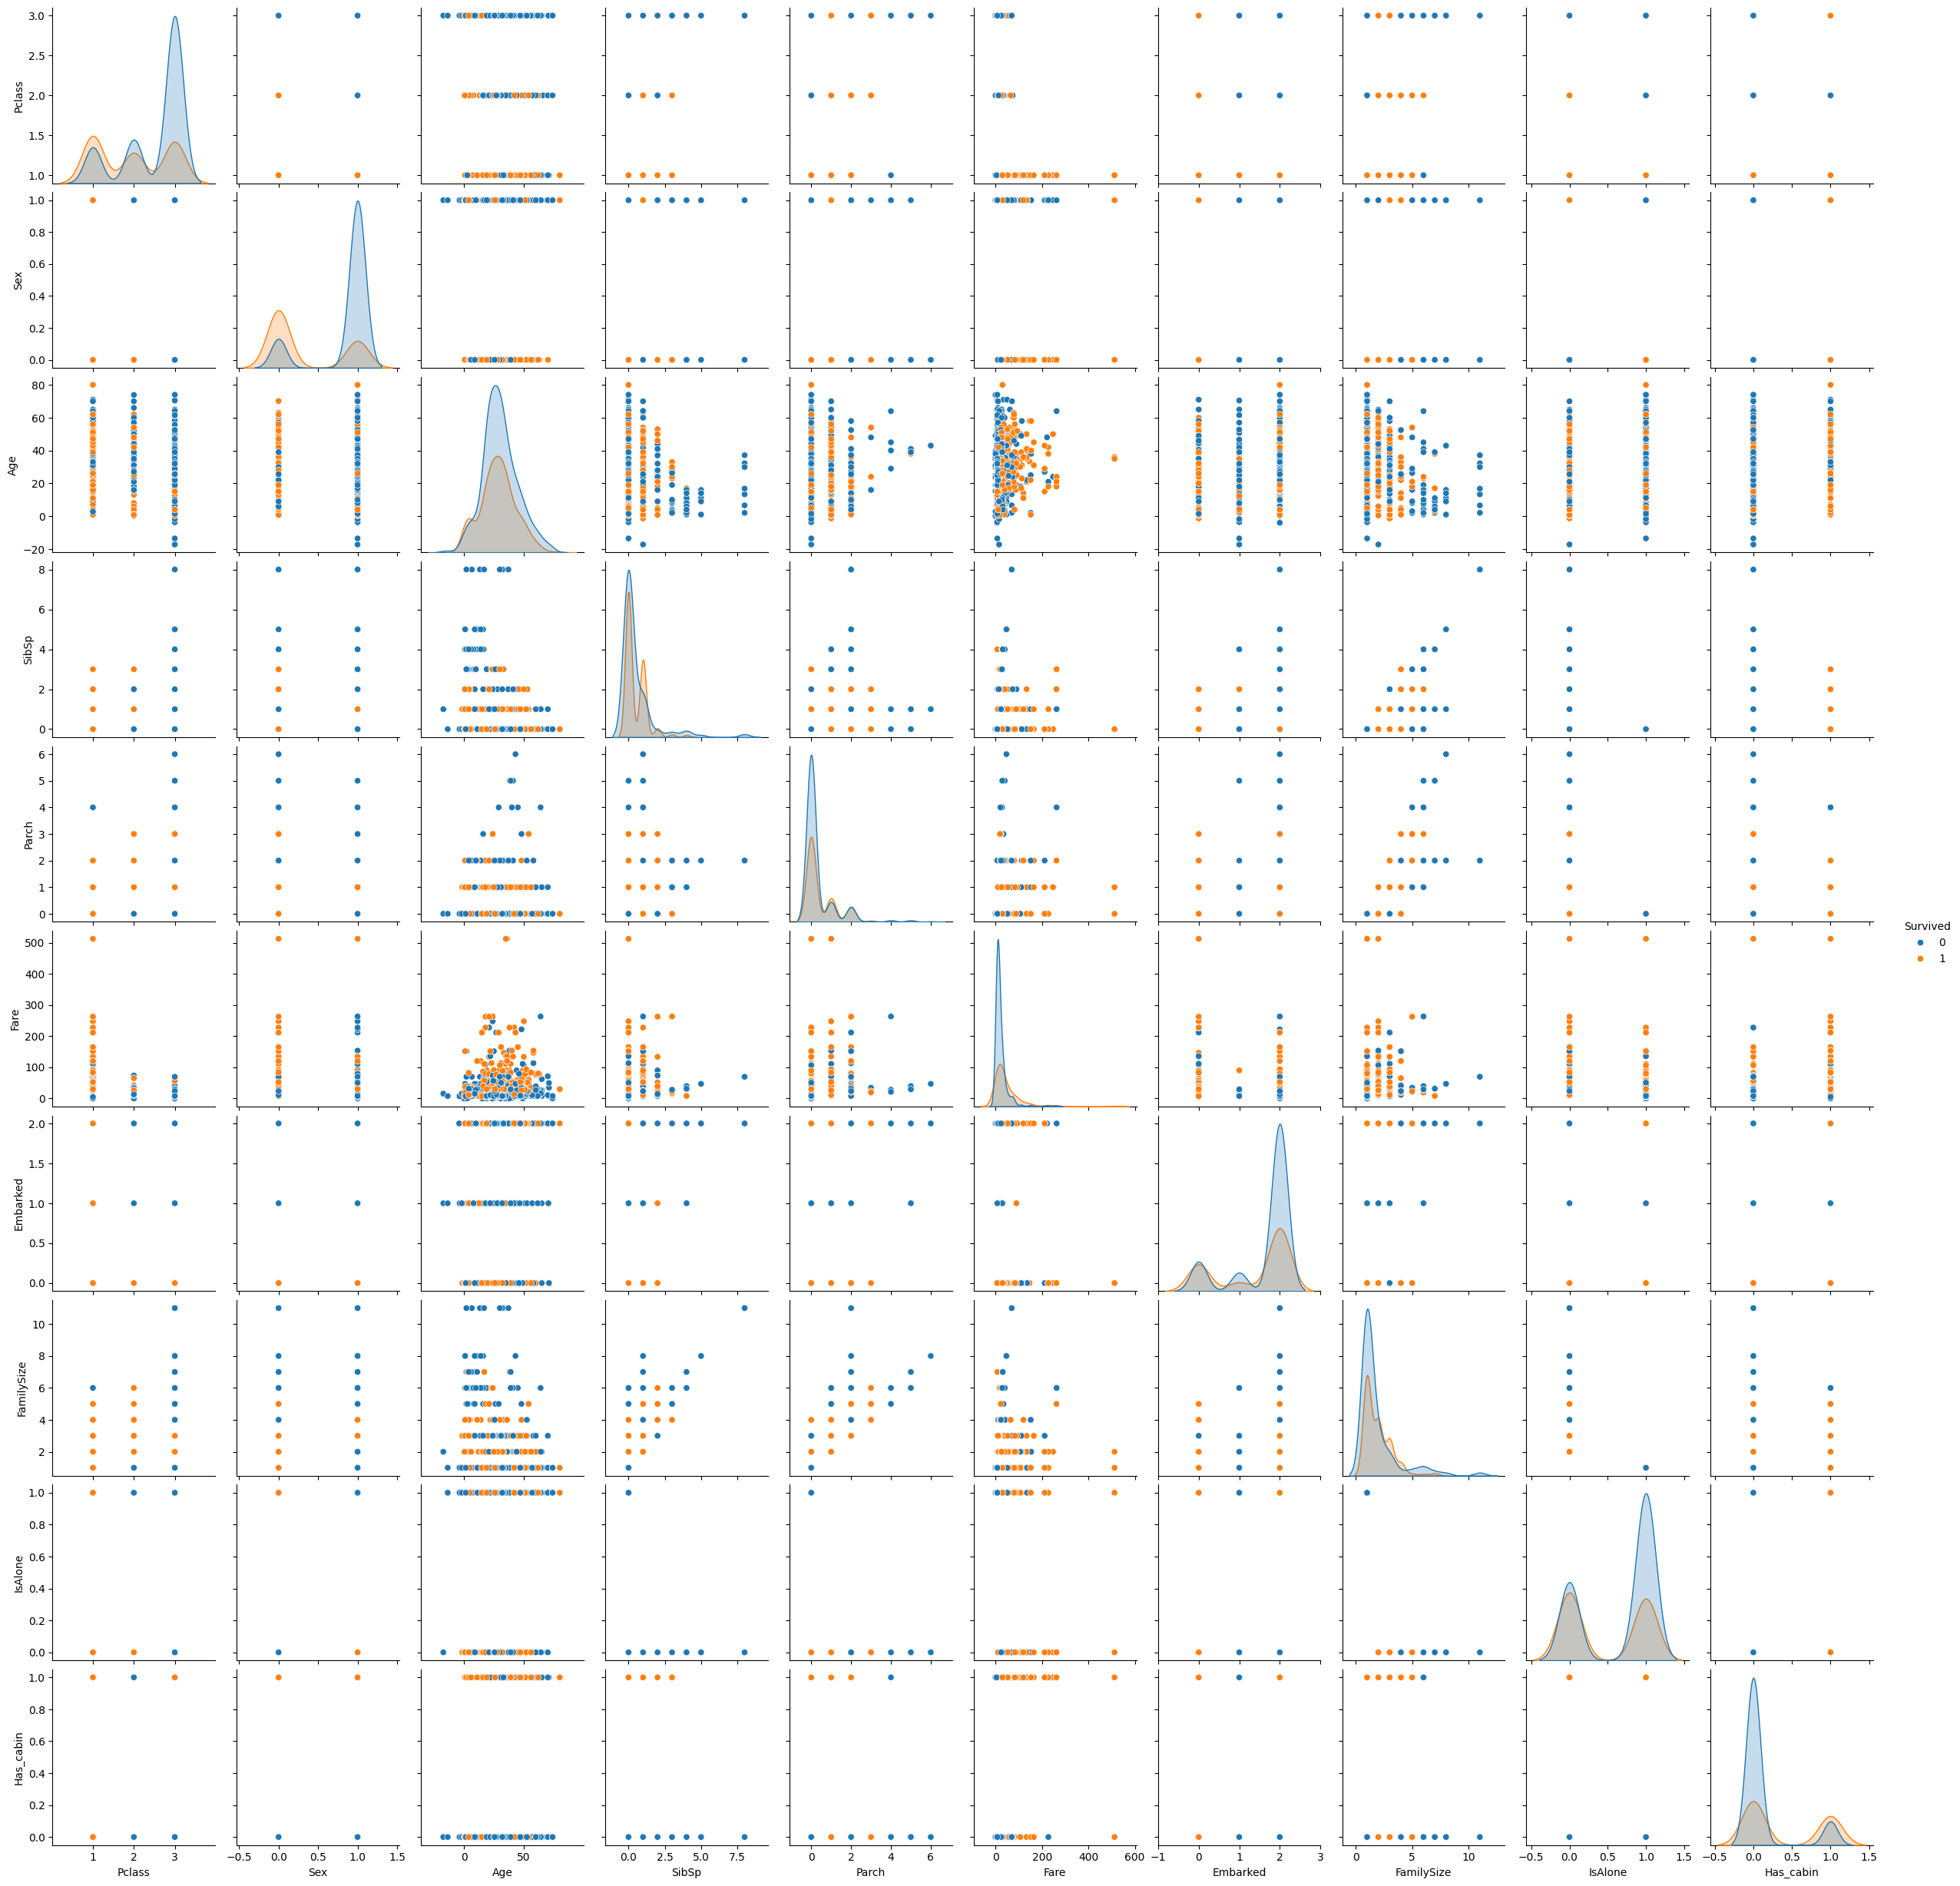

In [69]:
#Do a pairplot of all features

sns.pairplot(df, hue='Survived')

In [70]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [79]:
# Create the model
# Fitting the decision tree with default hyperparameters
# Importing decision tree classifier from sklearn library

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=3)

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

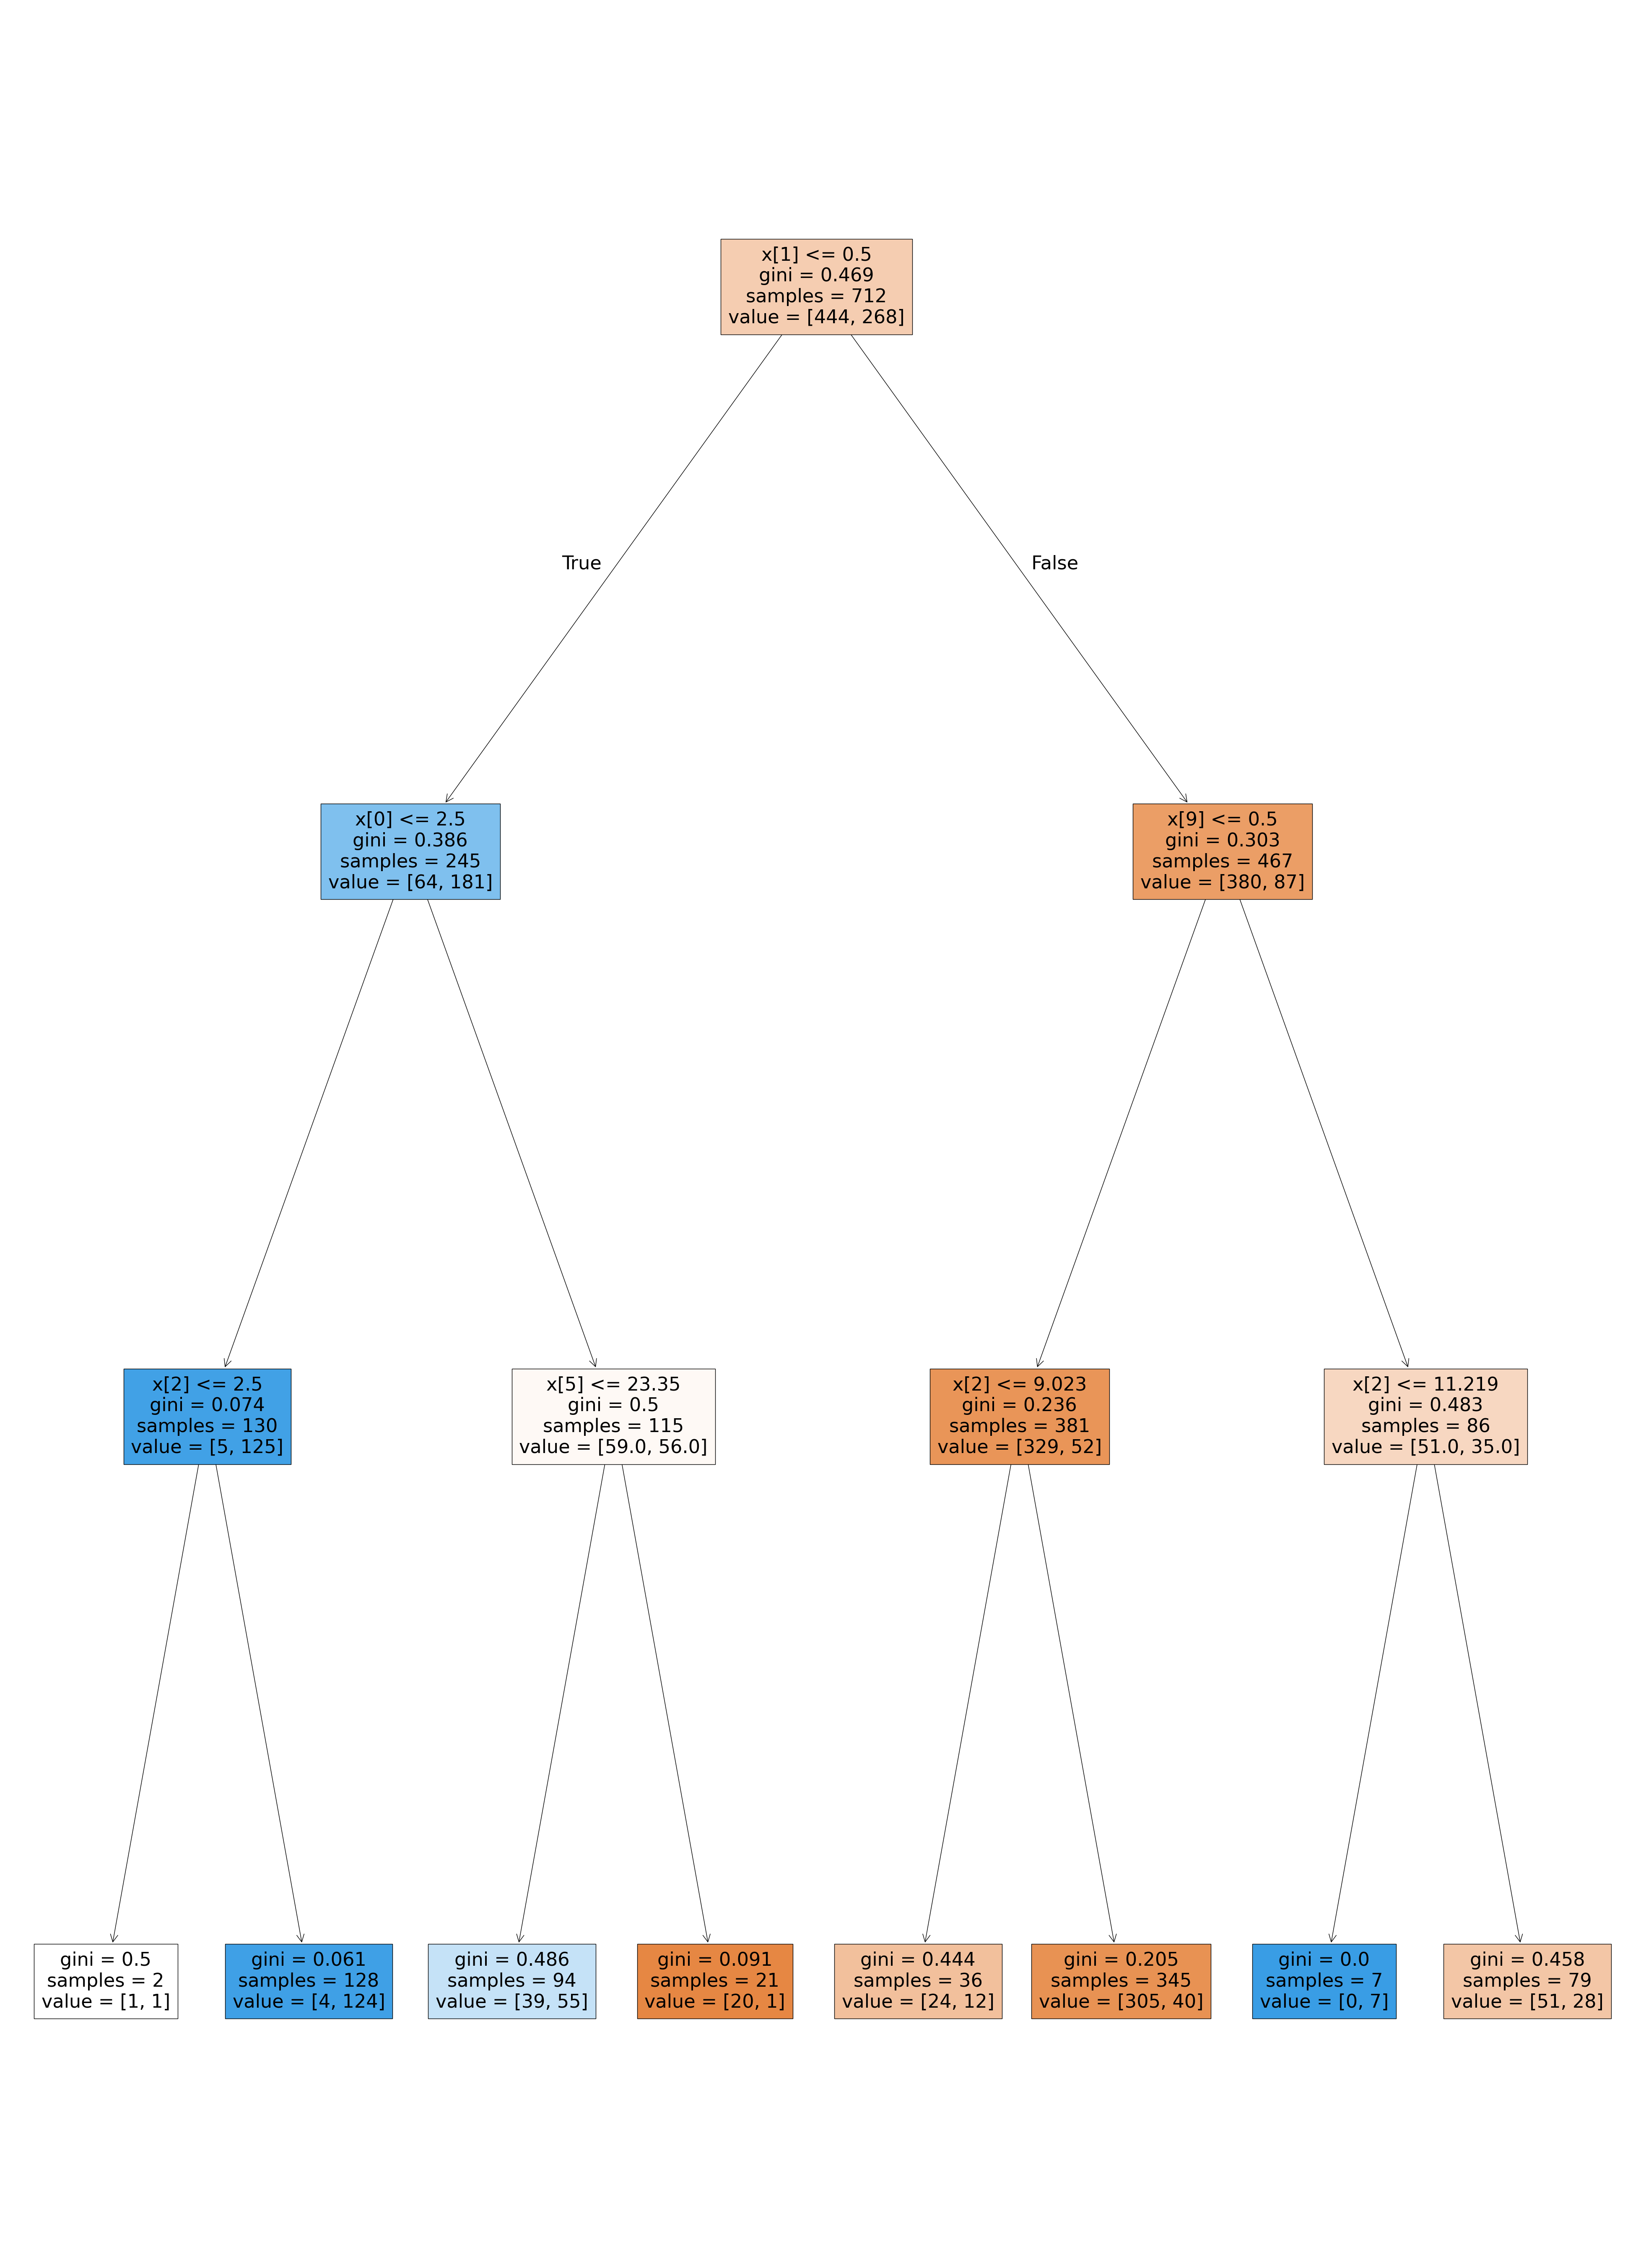

In [76]:
# Importing required packages for visualization

from sklearn.tree import plot_tree
plt.figure(figsize=(50,70))
plot_tree(model,filled=True)
plt.show()

In [ ]:
# Check the evaluation metrics of our default model on validation set - Confusion Matrix, Accuracy, Precision, Recall, F1 score
# Importing classification report and confusion matrix from sklearn metrics
# Making predictions
# Printing classification report

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

accuracy = accuracy_score(y_test,y_pred)
c_mat = confusion_matrix(y_test,y_pred)
c_rep = classification_report(y_test,y_pred)
print(c_mat)
print(c_rep)
print(accuracy)

[[92 13]
 [23 51]]
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179

0.7988826815642458
